In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
file_path = '../data/drinks.csv' #불러올 파일을 상대 경로로 지정, ../는 부모 폴터
drinks = pd.read_csv(file_path) #read_csv() 함수로 데이터를 데이터 프레임 형태로 불러옵니다.
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [4]:
#beer_serving, wine_servings 두 피처 간의 상관 계수를 계산합니다.
#pearson은 상관 계수를  구하는 계산 반법 중 하나를 의미하며, 가장 널리 쓰이는 방범입니다.
#피어슨 상관 계수 (Pearson Correlation Coefficient, pcc): 두변수 x 와 y 간의 선형 상관 관계를 계량화한 수치
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [5]:
#피처 간의 상관 계수 행렬을 구합니다. 
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols]. corr(method = 'pearson') 
#corr = drinks.corr(method = 'pearson'), 모두 불러올땐 데이터프레임만 불러와도 됨
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


[seaborn 시각화 라이브러리 활용]

-히트맵(heatmap), 페어플롯(pairplot) 기법 사용하기

-히트맵(heatmap: 히트(heat)와 지도를 뜻하는 맵(map)을 결합시킨 단어로 색상으로 표현할 수 있는 다양한 정보를
일정한 이미지 위에 열분포 형태의 그래픽으로 출력

In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<function matplotlib.pyplot.show(close=None, block=None)>

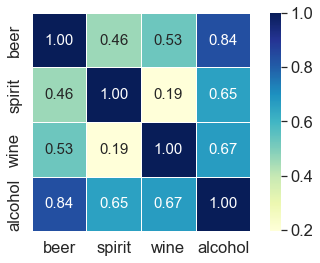

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
#corr 행렬 히트맵을 시각화합니다.
cols_view = ['beer','spirit', 'wine', 'alcohol'] #그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale = 1.5)
#cbar 히트맵 바 출력 여부, annot 상관 계수 출력 여부, square 사각형의 형태, fmt 소수점 자리수, 
#annot_kws  상관 계수 폰트 크기, yticklabels y 레이블명, xticklabels x 레이블명
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                linewidths=.5,
                cmap='YlGnBu',
                annot_kws = {'size':15},
                yticklabels = cols_view,
                xticklabels = cols_view)
plt.tight_layout()
plt.show



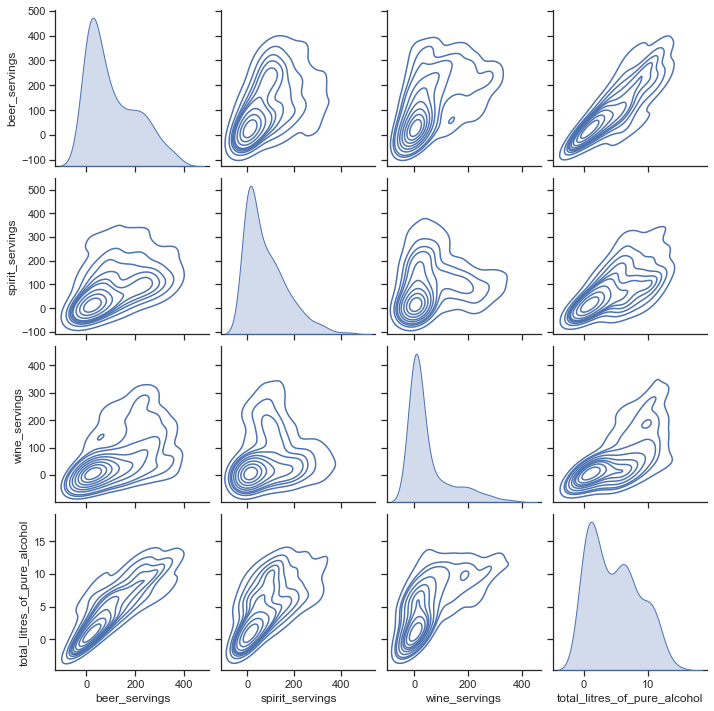

In [36]:
#시각화 라이브러리를 이용한 피처 간의 산점도 그래프를 출력합니다.
#페어플롯(pairplot)은 데이터 프레임을 파라미터로 넣어줌
sns.set(style = 'ticks', context = 'notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings', 'total_litres_of_pure_alcohol']], height = 2.5, kind = 'kde')
plt.show()

In [19]:
#결측 데이터를 처리합니다: 기타 대륙으로 통합 →'OT'
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


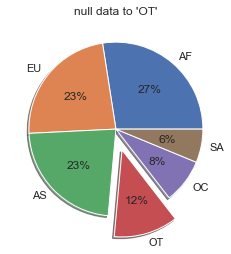

In [22]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0)

plt.pie(fracs1, explode = explode, labels = labels, autopct = '%.0f%%', shadow = True)
plt.title('null data to \'OT\'')
plt.show()

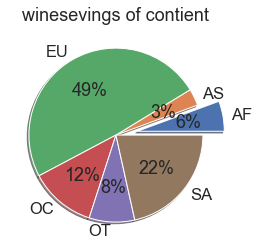

In [111]:
#대륙별 와인 소비량

drinks_conWine = drinks.groupby('continent')['wine_servings'].mean()
wine_index = drinks_conWine.index.tolist()
explode = (0.25,0,0,0,0,0)
plt.pie(drinks_conWine, explode = explode, labels = wine_index, autopct = '%.0f%%', shadow = True)
plt.title('winesevings of contient')
plt.show()

In [109]:
#전체 평균보다 적은 알코올을 섭취하는 대륙
total_mean = drinks['total_litres_of_pure_alcohol'].mean()
drinks_conLitres = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
total_less = drinks_conLitres[drinks_conLitres<=total_mean].index.tolist()
total_less

['AF', 'AS', 'OC']